In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
import numpy as np
def findNextPopulationValue(country, year):
  if(np.isnan(country[f"{year}"])):
    return findNextPopulationValue(country, year + 1)
    
  return [
      country["Country Name"], 
      str(year)[-2:],
      country[f"{year}"]
  ]

In [3]:
countries2 = pd.read_csv("countries2.csv")
data = []
for country in countries2.iloc:
  for year in range(1960, 2023):
    data.append(findNextPopulationValue(country, year))

countries = pd.DataFrame(data, columns=["country", "year", "population"])
# countries = pd.read_csv("countries.csv")

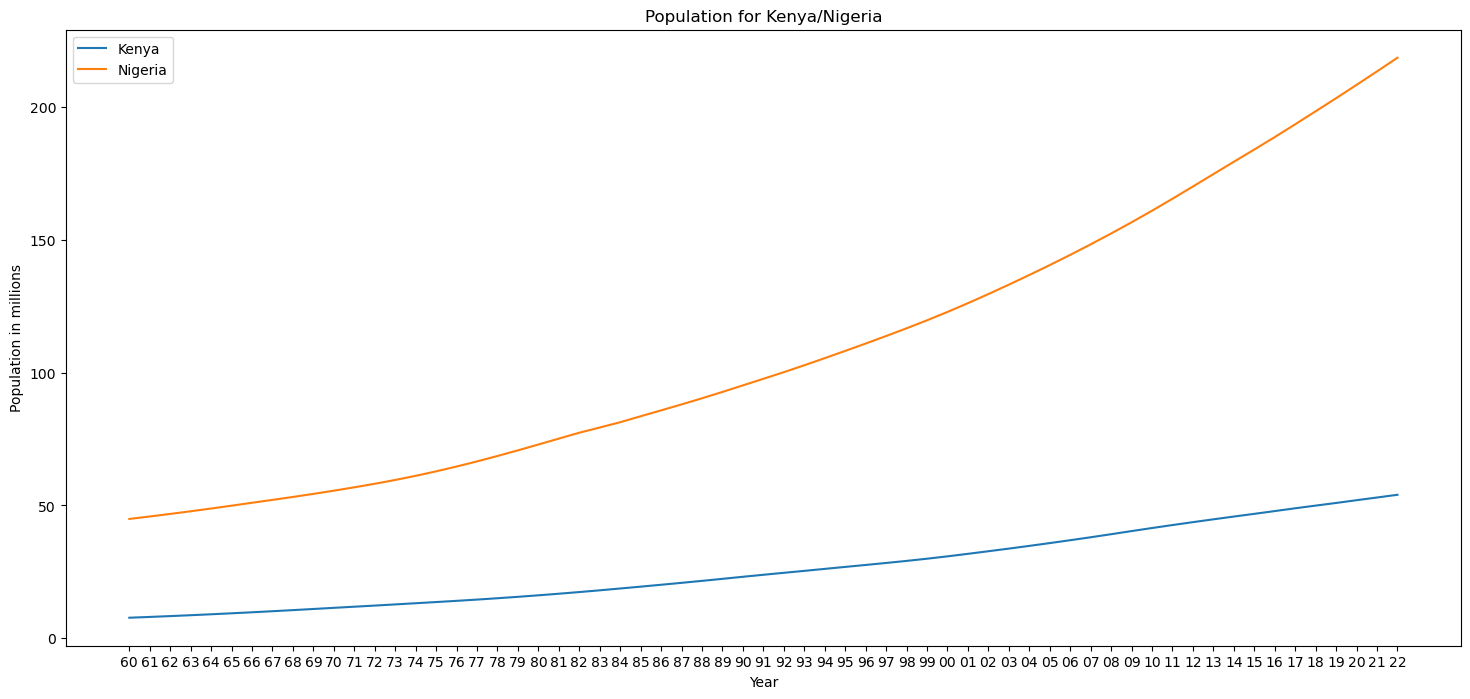

In [4]:
kenya = countries[countries.country == "Kenya"]
nigeria = countries[countries.country == "Nigeria"]

plt.figure(figsize=(18, 8))
plt.plot(kenya.year, kenya.population / 10**6)
plt.plot(nigeria.year, nigeria.population / 10**6)
plt.xlabel("Year")
plt.ylabel("Population in millions")
plt.title("Population for Kenya/Nigeria")
plt.legend(["Kenya", "Nigeria"])
plt.show()

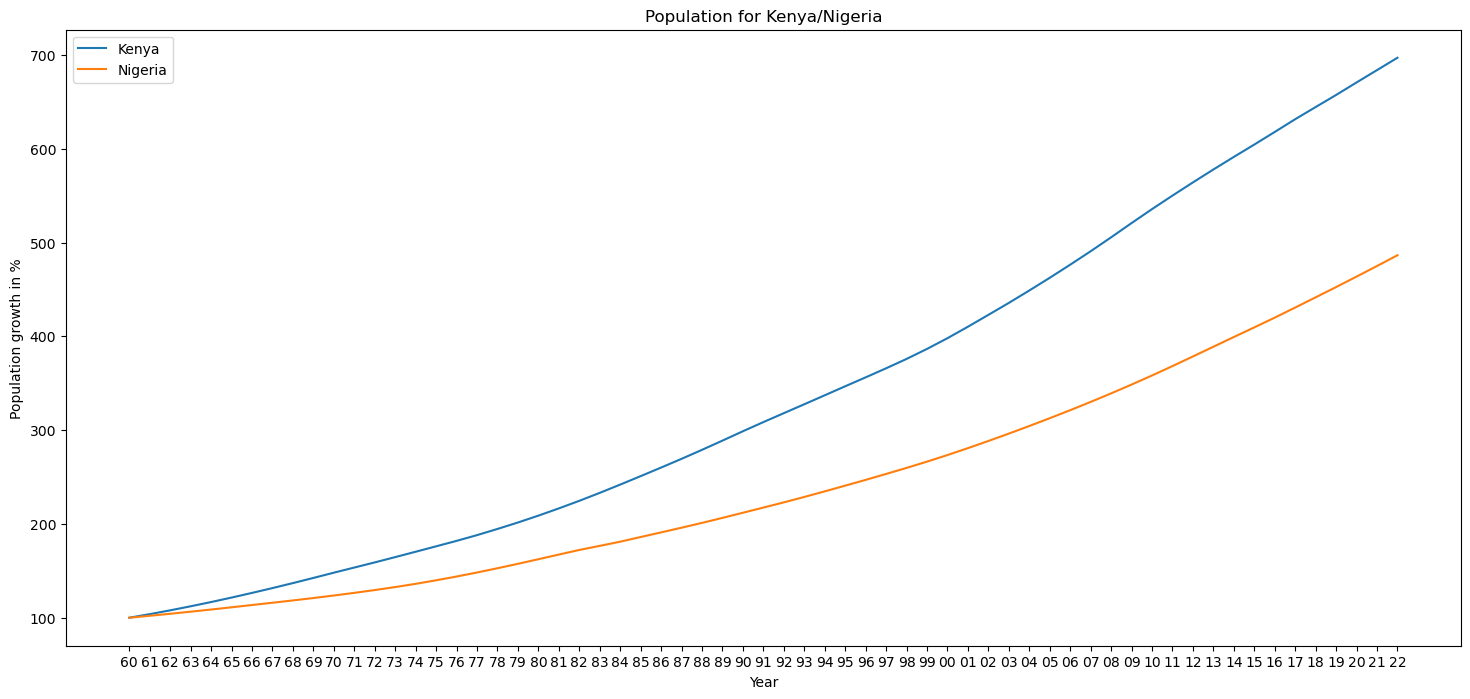

In [5]:
plt.figure(figsize=(18, 8))
plt.plot(kenya.year, kenya.population / kenya.population.iloc[0] * 100)
plt.plot(nigeria.year, nigeria.population / nigeria.population.iloc[0] * 100)
plt.xlabel("Year")
plt.ylabel("Population growth in %")
plt.title("Population for Kenya/Nigeria")
plt.legend(["Kenya", "Nigeria"])
plt.show()

In [6]:
min_max = {}
for country in countries.country.unique():
  data = countries[countries.country == country]
  growth = "%0.2f" % (data.population.iloc[len(data) - 1] / data.population.iloc[0] * 100,)
  min_max[country] = float(growth)

sorted_min_max = sorted(min_max.items(), key=lambda x: x[1])

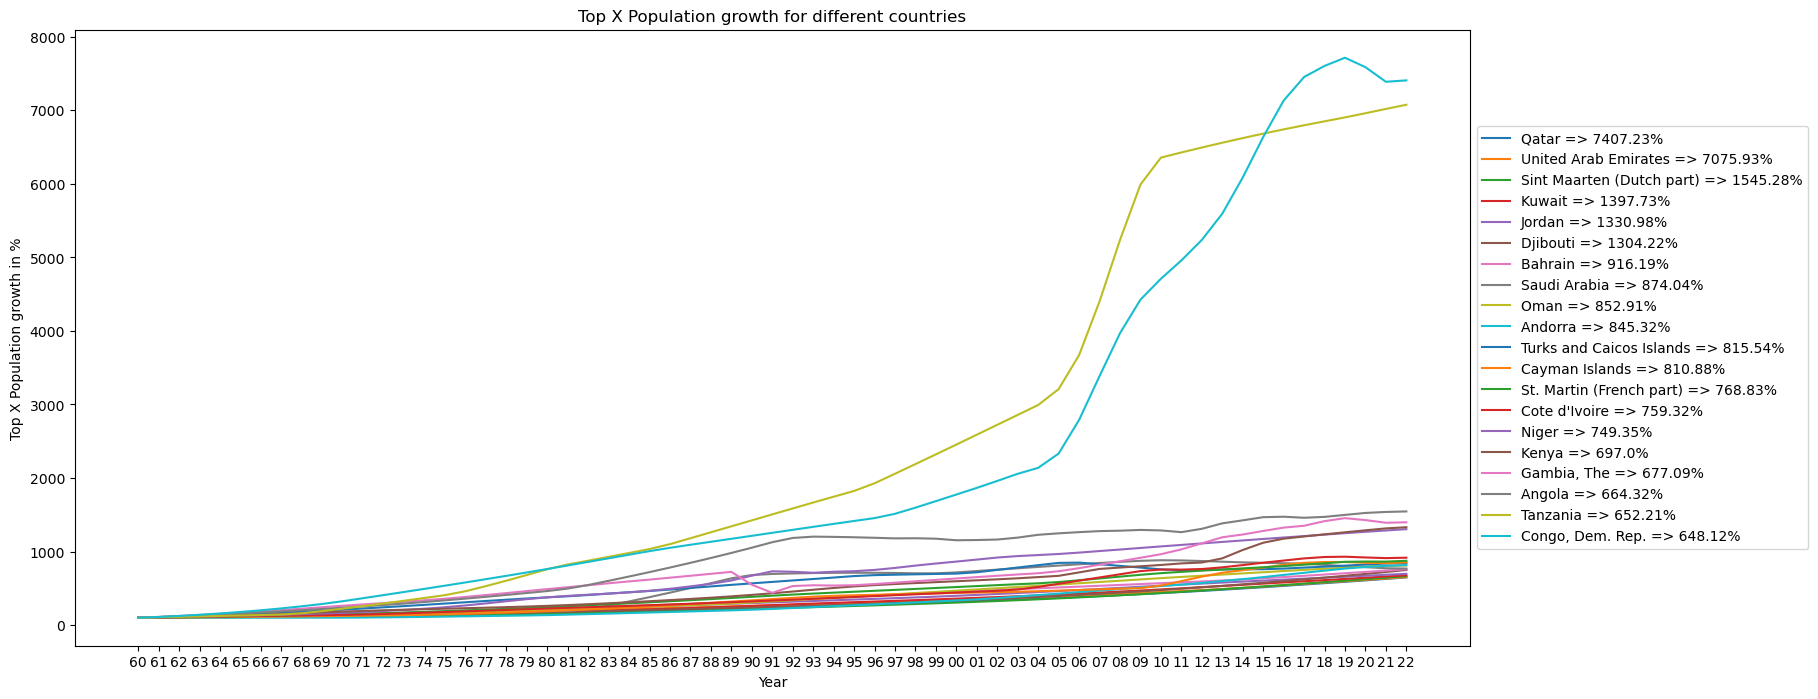

In [14]:
from itertools import islice
plt.figure(figsize=(18, 8))
plt.xlabel("Year")
plt.ylabel("Top X Population growth in %")
plt.title("Top X Population growth for different countries")

legend = []
size = len(min_max)
for country in islice(sorted_min_max, size - 20,  size): # Last X items
  data = countries[countries.country == country[0]]
  plt.plot(data.year, data.population / data.population.iloc[0] * 100)
  legend.append(f"{country[0]} => {country[1]}%")

plt.legend(legend[::-1], loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

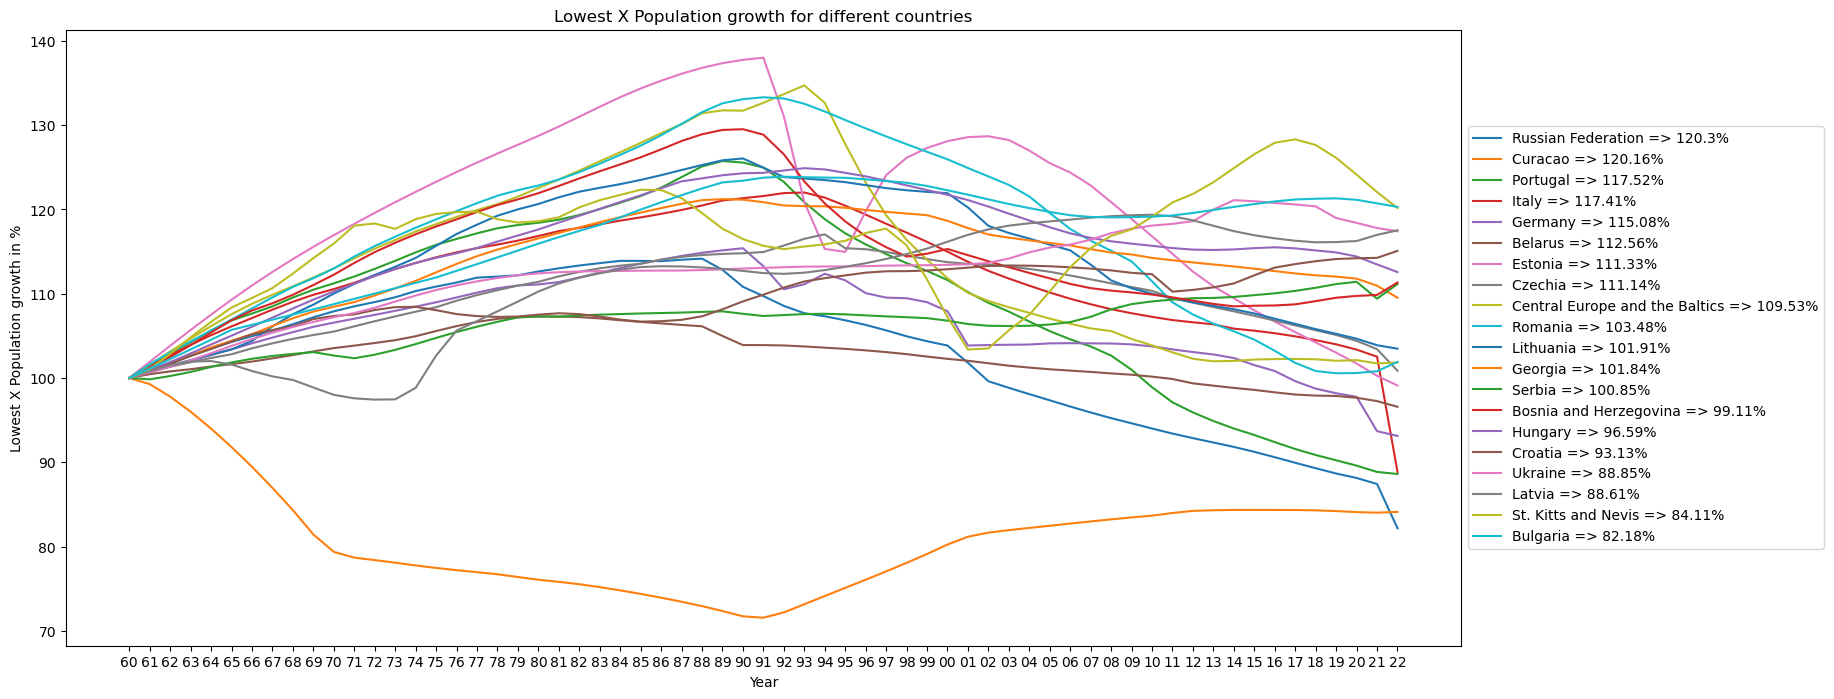

In [13]:
from itertools import islice
plt.figure(figsize=(18, 8))
plt.xlabel("Year")
plt.ylabel("Lowest X Population growth in %")
plt.title("Lowest X Population growth for different countries")

legend = []
size = len(min_max)
for country in islice(sorted_min_max, 20): # First X items
  data = countries[countries.country == country[0]]
  plt.plot(data.year, data.population / data.population.iloc[0] * 100)
  legend.append(f"{country[0]} => {country[1]}%")

plt.legend(legend[::-1], loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()